In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# 1.获取数据

In [201]:
df = pd.read_excel("cancer.xlsx")
df.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1
0,875099,B,9.72,18.22,60.73,288.1,0.06950,0.02344,?,?,0.1653,0.06447
1,913535,M,16.69,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.02307,0.1846,0.05325
2,889403,M,15.61,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.02847,0.1547,0.05443
3,869931,B,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580
4,874217,M,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    object 
 9   concave_points1     569 non-null    object 
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 53.5+ KB


# 2.数据预处理
## 2.1 清洗数据

In [203]:
df = df.replace(to_replace="?", value=np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          556 non-null    float64
 9   concave_points1     556 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


C:\Users\wzysc\AppData\Local\Temp\ipykernel_31020\1251669415.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(to_replace="?", value=np.nan)


In [204]:
df = df.dropna()

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, 1 to 568
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  556 non-null    int64  
 1   Diagnosis           556 non-null    object 
 2   radius1             556 non-null    float64
 3   texture1            556 non-null    float64
 4   perimeter1          556 non-null    float64
 5   area1               556 non-null    float64
 6   smoothness1         556 non-null    float64
 7   compactness1        556 non-null    float64
 8   concavity1          556 non-null    float64
 9   concave_points1     556 non-null    float64
 10  symmetry1           556 non-null    float64
 11  fractal_dimension1  556 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 56.5+ KB


## 2.3 筛选特征值，编码目标变量

In [206]:
# 确定特征值
x = df.iloc[:,2:13]
# 编码目标变量
y = df["Diagnosis"].replace({'B':0,'M':1})
df.head()

C:\Users\wzysc\AppData\Local\Temp\ipykernel_31020\654727346.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["Diagnosis"].replace({'B':0,'M':1})


,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1
1,913535,M,16.69,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.02307,0.1846,0.05325
2,889403,M,15.61,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.02847,0.1547,0.05443
3,869931,B,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580
4,874217,M,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425
5,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200


## 2.4 分割数据

In [207]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=22)

## 2.5 标准化

In [208]:
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# 3 模型训练与测试
## 3.1 逻辑回归
### 3.1.1 训练逻辑回归模型

In [209]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

### 3.1.2 测试逻辑回归模型

In [210]:
y_pred_logistic = logistic_model.predict(x_test)
logistic_accuracy = accuracy_score(y_test,y_pred_logistic)
print(f"LogisticRegression Accuracy:{logistic_accuracy}")

LogisticRegression Accuracy:0.9568345323741008


### 3.1.3 逻辑回归交叉验证

In [211]:
scores = cross_val_score(logistic_model, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores (accuracy):", scores)
print("Average cross-validation score (accuracy): {:.2f}".format(scores.mean()))

Cross-validation scores (accuracy): [0.94047619 0.92857143 0.92771084 0.89156627 0.95180723]
Average cross-validation score (accuracy): 0.93


## 3.2 支持向量机
### 3.2.1 训练svm模型

In [212]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

### 3.2.2 测试svm模型

In [213]:
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9568345323741008


## 3.2.3 svm消融实验

In [214]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9496402877697842


In [215]:
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9568345323741008


In [216]:
svm_model = SVC(kernel='sigmoid')
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9136690647482014


### 3.2.4 svm参数调优

In [217]:
svm_model = SVC(kernel='linear',C=5)
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9640287769784173


In [218]:
svm_model = SVC(kernel='linear',C=5, gamma=0.1)
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9640287769784173


In [219]:
svm_model = SVC(kernel='linear',C=5, gamma=0.1, degree=2)
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9640287769784173


In [220]:
svm_model = SVC(kernel='linear',C=5, gamma=0.1, degree=2, coef0=0.1)
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9640287769784173


发现影响因子为：tol，对tol进行参数更换，

In [221]:
svm_model = SVC(kernel='linear',C=5, gamma=0.1, degree=2, coef0=0.1, tol=0.1)
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9640287769784173


In [222]:
svm_model = SVC(kernel='linear',C=5, gamma=0.1, degree=2, coef0=0.1, tol=0.01)
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9640287769784173


In [223]:
svm_model = SVC(kernel='linear',C=5, gamma=0.1, degree=2, coef0=0.1, tol=0.001)
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9640287769784173


In [224]:
svm_model = SVC(kernel='linear',C=5, gamma=0.1, degree=2, coef0=0.1, tol=0.0000001)
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9640287769784173


In [225]:
svm_model = SVC(kernel='linear',C=5, gamma=0.1, degree=2, coef0=0.1, tol=0.1, max_iter=100, random_state=22)
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.1079136690647482


D:\MyCondaEnvs\test\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [226]:
svm_model = SVC(kernel='linear',C=5, gamma=0.1, degree=2, coef0=0.1, tol=0.1, max_iter=200000, random_state=2222)
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9640287769784173


### 3.2.5 svm选定

In [227]:
svm_model = SVC(kernel='linear',C=5, gamma=0.1, degree=2, coef0=0.1, tol=0.0000001)
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print(f"svm accuracy:{svm_accuracy}")

svm accuracy:0.9640287769784173


# 4 模型评估
## 4.1 逻辑回归模型评估

In [228]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84
           1       0.96      0.93      0.94        55

    accuracy                           0.96       139
   macro avg       0.96      0.95      0.95       139
weighted avg       0.96      0.96      0.96       139



In [229]:
fpr,tpr,thres = roc_curve(y_test,y_pred_logistic)
a = pd.DataFrame()
print("Logistic Regression:")
a['阈值'] = list(thres)
a['假阳性率'] = list(fpr)
a['真阳性率'] = list(tpr)
print(a.head())

Logistic Regression:
    阈值     假阳性率      真阳性率
0  inf  0.00000  0.000000
1  1.0  0.02381  0.927273
2  0.0  1.00000  1.000000


## 4.2 svm模型评估

In [230]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        84
           1       0.96      0.95      0.95        55

    accuracy                           0.96       139
   macro avg       0.96      0.96      0.96       139
weighted avg       0.96      0.96      0.96       139



In [231]:
fpr,tpr,thres = roc_curve(y_test,y_pred_svm)
a = pd.DataFrame()
print("SVM:")
a['阈值'] = list(thres)
a['假阳性率'] = list(fpr)
a['真阳性率'] = list(tpr)
print(a.head())

SVM:
    阈值     假阳性率      真阳性率
0  inf  0.00000  0.000000
1  1.0  0.02381  0.945455
2  0.0  1.00000  1.000000


# 5 绘制逻辑回归和svm的预测结果

In [232]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

## 5.1 逻辑回归预测结果

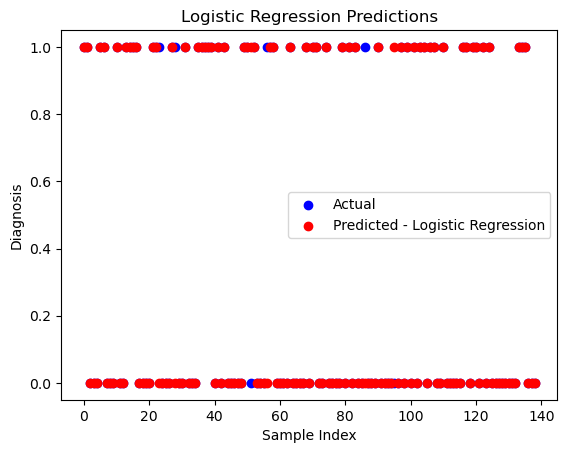

In [233]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_logistic)), y_pred_logistic, color='red', label='Predicted - Logistic Regression')
plt.title('Logistic Regression Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Diagnosis')
plt.legend()

## 5.2 svm预测结果

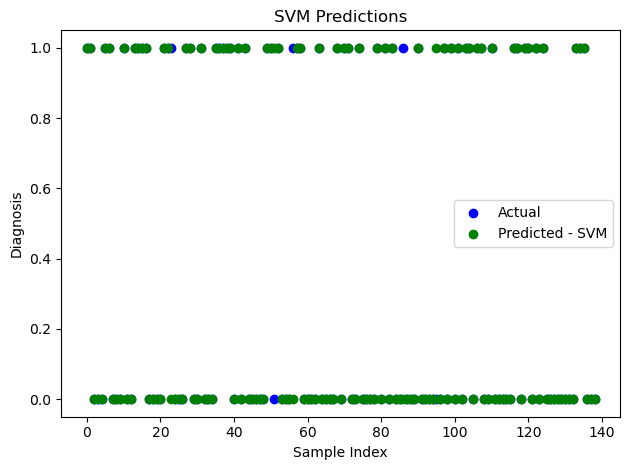

In [234]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_svm)), y_pred_svm, color='green', label='Predicted - SVM')
plt.title('SVM Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Diagnosis')
plt.legend()
plt.tight_layout()
plt.show()

## 5.3 模型预测结果准确度的直方图

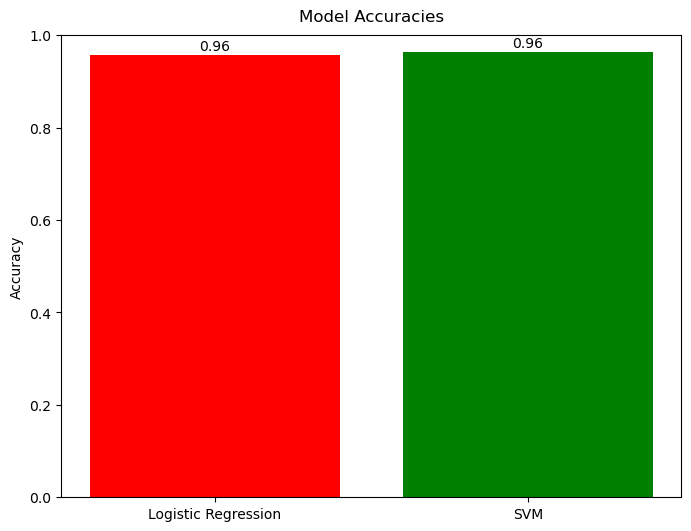

In [235]:
accuracies = [logistic_accuracy, svm_accuracy]
models = ['Logistic Regression', 'SVM']
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['red', 'green'])
plt.title('Model Accuracies',pad=10)
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.01, f"{acc:.2f}", ha='center')
plt.show()